# Preprocesamiento

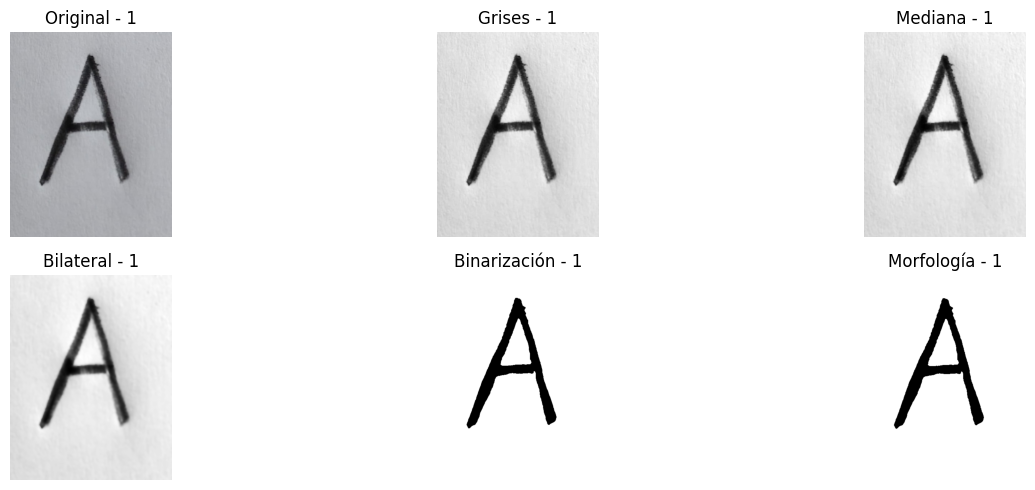

Procesamiento completado para: 1.jpeg
--------------------------------------------------


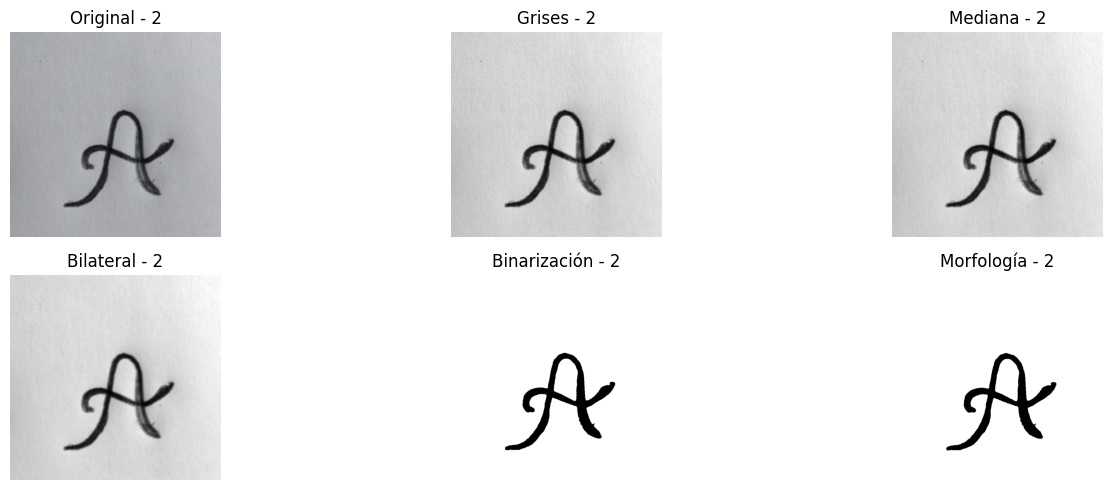

Procesamiento completado para: 2.jpeg
--------------------------------------------------


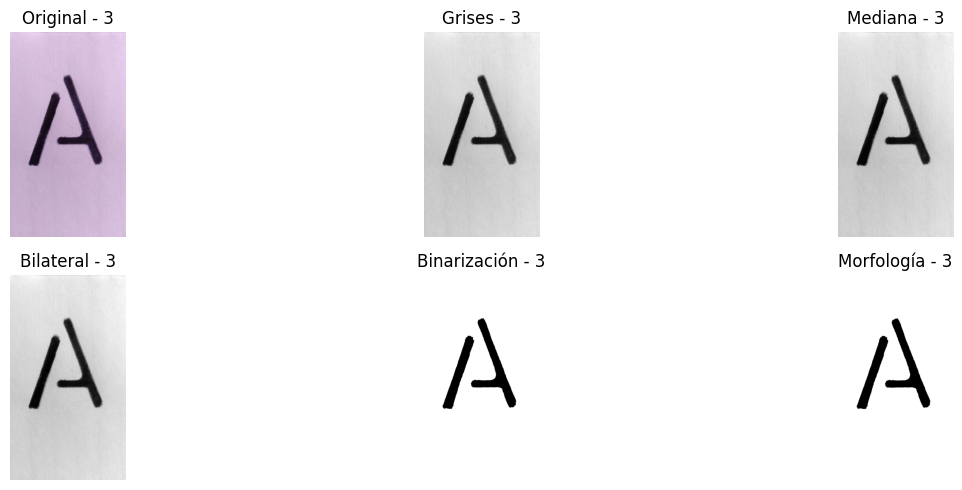

Procesamiento completado para: 3.jpeg
--------------------------------------------------


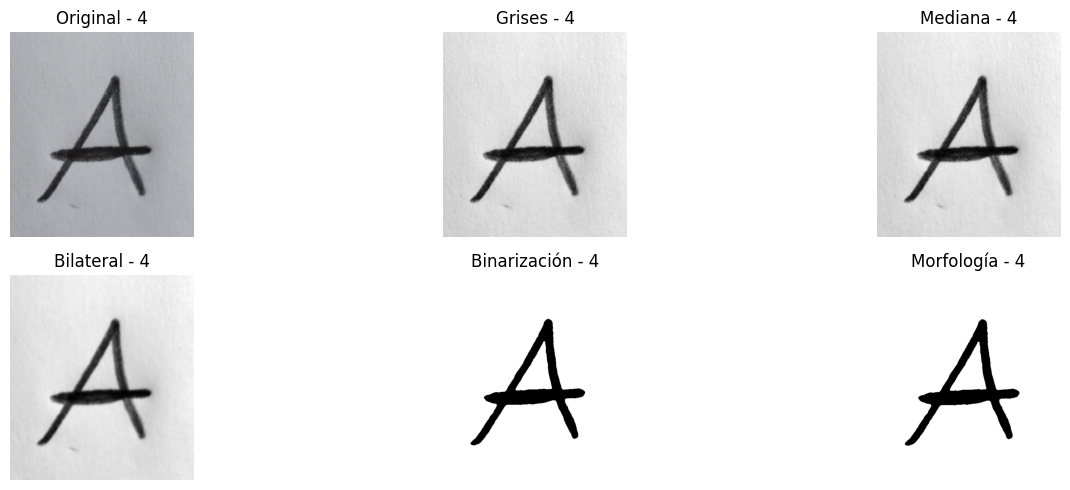

Procesamiento completado para: 4.jpeg
--------------------------------------------------


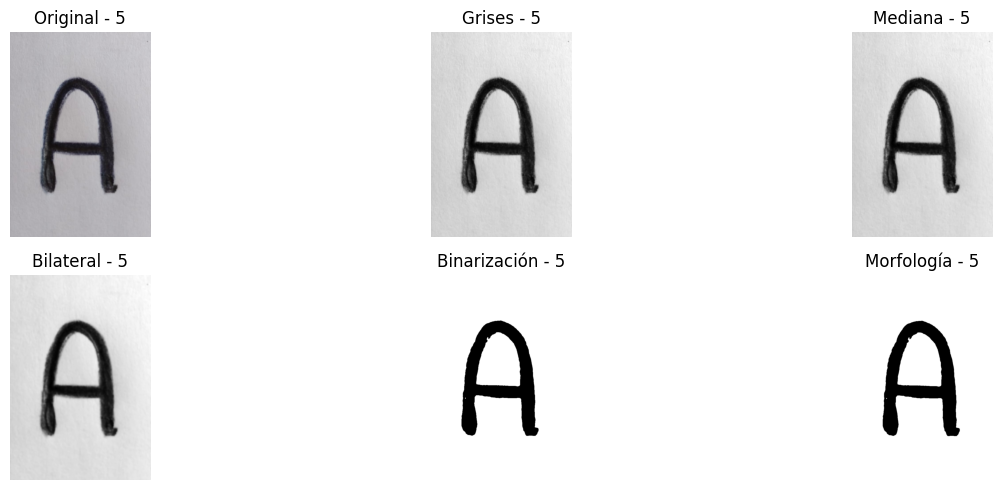

Procesamiento completado para: 5.jpeg
--------------------------------------------------


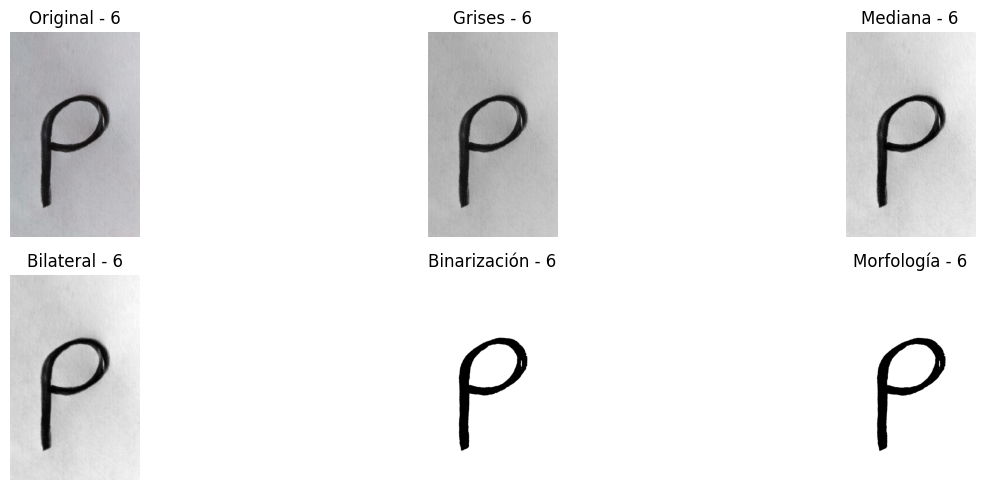

Procesamiento completado para: 6.jpeg
--------------------------------------------------


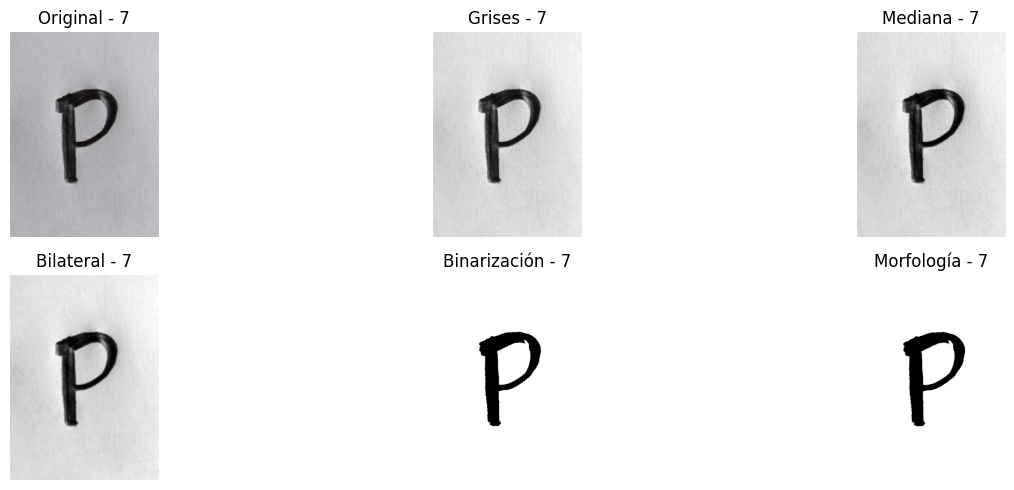

Procesamiento completado para: 7.jpeg
--------------------------------------------------


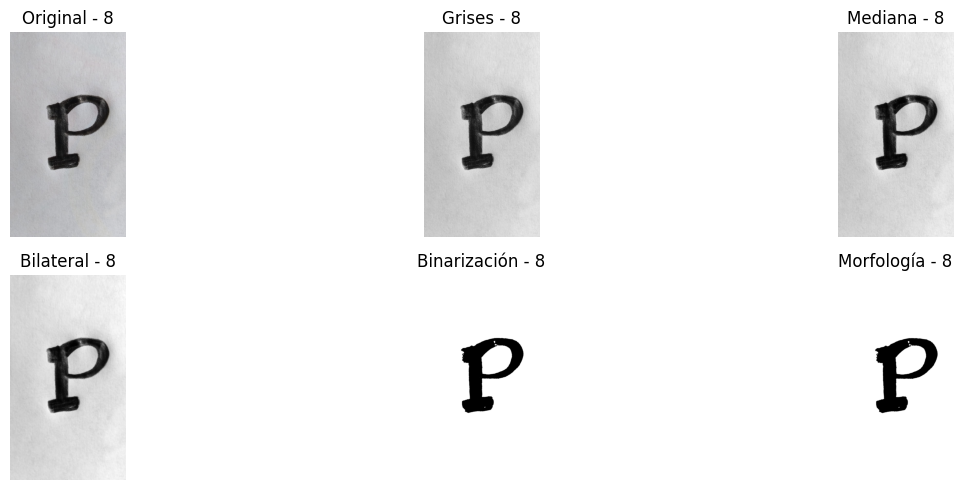

Procesamiento completado para: 8.jpeg
--------------------------------------------------


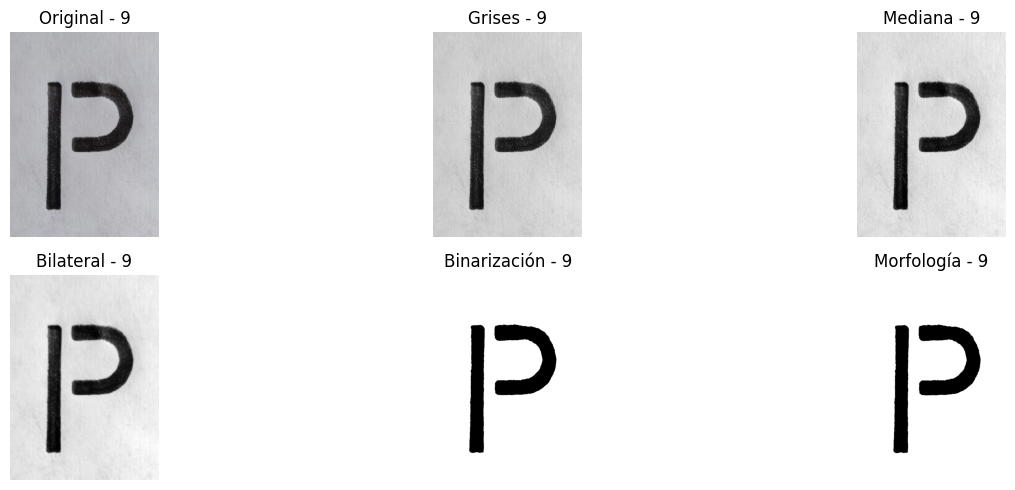

Procesamiento completado para: 9.jpeg
--------------------------------------------------


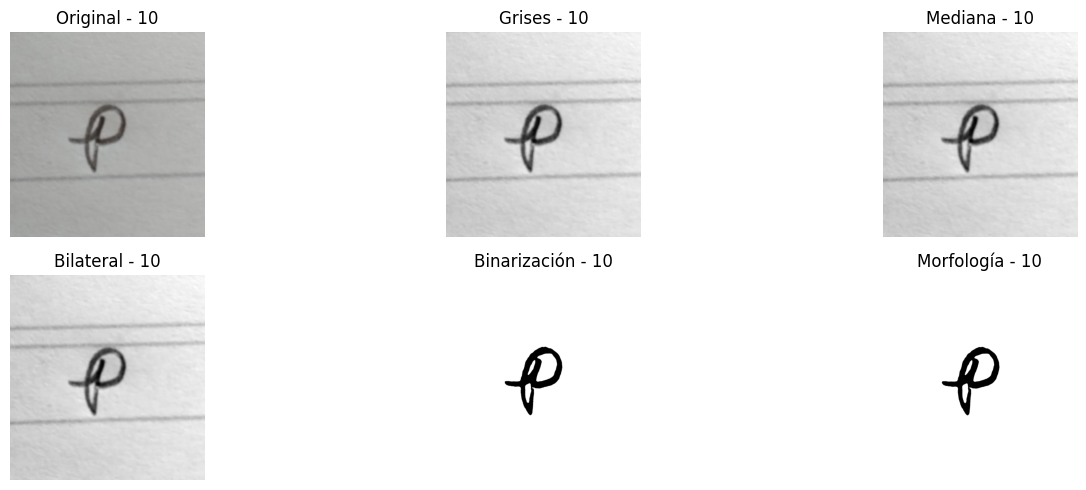

Procesamiento completado para: 10.jpeg
--------------------------------------------------
¡Procesamiento de todas las imágenes completado!


In [3]:
import cv2
import matplotlib.pyplot as plt
import os

# Crear directorio de resultados si no existe
os.makedirs('resultados', exist_ok=True)

# Lista de imágenes a procesar
imagenes = ['1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg', '7.jpeg','8.jpeg', '9.jpeg', '10.jpeg']

for nombre_img in imagenes: 
    try:
        # 1. Leer imagen
        img = cv2.imread(nombre_img)
        if img is None:
            print(f"Error: No se pudo cargar la imagen {nombre_img}")
            continue
            
        # 2. Convertir a escala de grises
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # 3. Filtro de mediana (reduce ruido sal/pimienta)
        median = cv2.medianBlur(gray, 3)

        # 4. Filtro bilateral (suaviza pero preserva bordes)
        bilateral = cv2.bilateralFilter(median, d=9, sigmaColor=75, sigmaSpace=75)

        # 5. Binarización (Otsu)
        _, thresh = cv2.threshold(bilateral, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 6. Operaciones morfológicas para limpiar el texto
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

        # Crear directorio para los resultados de esta imagen
        img_name = os.path.splitext(nombre_img)[0]
        os.makedirs(f'resultados/{img_name}', exist_ok=True)

        # Guardar resultados
        cv2.imwrite(f"resultados/{img_name}/0_original.jpg", img)
        cv2.imwrite(f"resultados/{img_name}/1_grises.jpg", gray)
        cv2.imwrite(f"resultados/{img_name}/2_mediana.jpg", median)
        cv2.imwrite(f"resultados/{img_name}/3_bilateral.jpg", bilateral)
        cv2.imwrite(f"resultados/{img_name}/4_binarizada_otsu.jpg", thresh)
        cv2.imwrite(f"resultados/{img_name}/5_morfologia.jpg", morph)

        # Mostrar resultados
        titles = ['Original', 'Grises', 'Mediana', 'Bilateral', 'Binarización', 'Morfología']
        images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), gray, median, bilateral, thresh, morph]

        plt.figure(figsize=(15, 5))
        for i in range(len(images)):
            plt.subplot(2, 3, i+1)
            if i == 0:
                plt.imshow(images[i])
            else:
                plt.imshow(images[i], cmap='gray')
            plt.title(f"{titles[i]} - {img_name}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

        print(f"Procesamiento completado para: {nombre_img}")
        print("-" * 50)

    except Exception as e:
        print(f"Error procesando {nombre_img}: {str(e)}")

print("¡Procesamiento de todas las imágenes completado!")